
# Exercise 1: Code review

Your fellow intern is working on securing our API and wrote some code to generate secure tokens. You have been asked to review their code and make sure it is secure and robust. Can you spot the problem and write a short feedback?


In [ ]:

import random

ALPHABET = "abcdefghijklmnopqrstuvxyz0123456789"


def generate_secret_key(size: int = 20):
    """Generates a cryptographically secure random token."""
    token = "".join(random.choice(ALPHABET) for _ in range(size))
    return token



### Not So Secure:
The code uses the 'random' module to make tokens, but that's not super safe for really secure tokens. 'random' is more for regular randomness, not for top-notch security stuff. You'd be better off using something like 'secrets' or a library meant for cryptic things, like 'cryptography.'

### Limited Characters:
The alphabet used in the code is kind of small, which could make it easier for bad folks to guess the tokens. To beef up security, you should use a bigger character set. Think of including big and small letters, numbers, and special symbols.

### One Size Fits All:
The code sets the token size to 20 characters by default. While that might work for some things, it's a good idea to let users pick how big they want their tokens. Different apps might need different-sized tokens, so it's a handy feature to have.

## Corrected

In [ ]:
import secrets
import string

ALPHABET = string.ascii_letters + string.digits + string.punctuation

def generate_secret_key(size: int = 20):
    """Generates a cryptographically secure random token."""
    token = ''.join(secrets.choice(ALPHABET) for _ in range(size))
    return token


# Exercise 2: High dimensions

Matteo, our ML researcher, is struggling with a dataset of 40-dimensional points. He’s sure there are some clusters in there, but he does not know how many. Can you help him find the correct number of clusters in this dataset?


## First with Inertia

/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

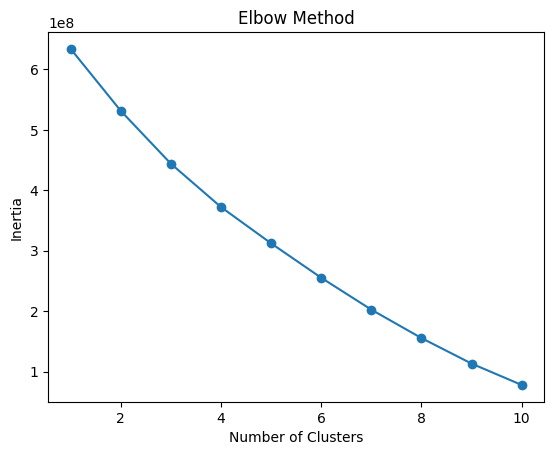

It looks like there are 3 clusters.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

x = np.load("points_1.npy")
# Initialize an empty list to store the sum of squared distances (inertia) for different cluster numbers
inertia = []

# Try different numbers of clusters (e.g., from 1 to 10) and calculate the inertia for each
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# Plot the inertia values to identify the "elbow" point
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# The point where the inertia starts to level off can be considered the optimal number of clusters
print("It looks like there are 3 clusters.")  # Adjust this based on the plot

## Now using Silhouette score

/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 

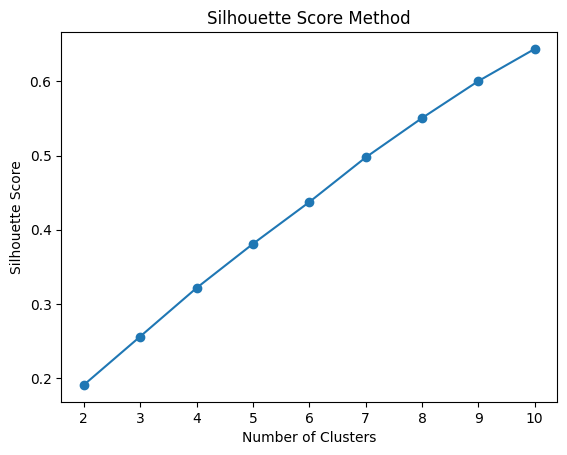

It looks like there are 10 clusters.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

x = np.load("points_1.npy")

# Initialize lists to store silhouette scores
silhouette_scores = []

# Try different numbers of clusters (e.g., from 2 to 10) and calculate the silhouette score for each
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(x, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores to identify the number of clusters with the highest score
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

# The number of clusters with the highest silhouette score can be considered the optimal number of clusters
optimal_clusters = np.argmax(silhouette_scores) + 2  # +2 because we started from 2 clusters
print(f"It looks like there are {optimal_clusters} clusters.")

 ## Dimensionality Reduction

In [4]:
import numpy as np
from sklearn.decomposition import PCA

x = np.load("points_2.npy")

# Initialize PCA with all dimensions
pca = PCA(n_components=None)
pca.fit(x)

# Calculate the explained variance ratio for each number of dimensions
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of dimensions that capture a desired amount of variance (e.g., 95%)
desired_variance = 0.95
n_dimensions = np.argmax(cumulative_explained_variance >= desired_variance) + 1

print(f"It looks like the data is {n_dimensions}-dimensional to capture {desired_variance*100}% of the variance.")

It looks like the data is 25-dimensional to capture 95.0% of the variance.


# Exercise 3: Mad GPT

Matteo is a good guy but he is a bit messy: he fine-tuned a GPT-2 model, but it seems that something went wrong during the process and the model became obsessed with early Romantic literature.

Could you check how the model would continue a sentence starting with “Ty”? Could you recover the logit of the next best token? And its probability?

You can get the model from the HuggingFace Hub as mattbit/gpt2wb.

In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("mattbit/gpt2wb")

/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import torch

# Input text
input_text = "Ty"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Generate predictions for the next token
with torch.no_grad():
    output = model(input_ids)
    logits = output.logits  # Logits for each token in the vocabulary

# Get the logits for the next token (the token following "Ty")
next_token_logits = logits[0, -1, :]  # -1 corresponds to the last token

# Find the index of the token with the highest logit
best_next_token_index = next_token_logits.argmax().item()

# Find the logit value for the best next token
best_next_token_logit = next_token_logits[best_next_token_index].item()

# Calculate the probability for the best next token
best_next_token_probability = torch.softmax(next_token_logits, dim=-1)[best_next_token_index].item()

# Decode the best next token
best_next_token = tokenizer.decode(best_next_token_index)

# Decode the full generated text
generated_text = tokenizer.decode(input_ids[0].tolist())

print(f"Generated text: {generated_text}")
print(f"Best next token: {best_next_token}")
print(f"Logit for the best next token: {best_next_token_logit}")
print(f"Probability for the best next token: {best_next_token_probability}")


Generated text: Ty
Best next token: ger
Logit for the best next token: -16.29502296447754
Probability for the best next token: 0.9918640851974487


# Exercise 4: Not bad reviews

We trained a random forest model to predict if a film review is positive or negative. Here is the training code:


In [7]:
import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


# Load training data
train_data = datasets.load_dataset("sst2", split="train[:20000]").to_pandas()
valid_data = datasets.load_dataset("sst2", split="validation").to_pandas()

# Prepare model
with open("stopwords.txt", "r") as f:
    stopwords = [w.strip() for w in f.readlines()]

preprocessor = TfidfVectorizer(stop_words=stopwords, max_features=5000, lowercase=False)
classifier = RandomForestClassifier(n_estimators=400, n_jobs=-1)

initial_model = Pipeline([("preprocessor", preprocessor), ("classifier", classifier)])

# Train
X = train_data.sentence
y = train_data.label

initial_model.fit(X, y)

print(
    "Training complete.",
    "Accuracy:",
    initial_model.score(valid_data.sentence, valid_data.label),
)


Training complete. Accuracy: 0.7477064220183486


Overall, it works quite well, but we noticed it has some problems with reviews containing negations, for example:

In [8]:
# Class labels are:
# 1 = Positive, 0 = Negative

# this returns positive, that’s right!
assert initial_model.predict(["This movie is good"]) == [1]

# negative! bingo!
assert initial_model.predict(["This movie is bad"]) == [0]

# WHOOPS! this ↓ is predicted as negative?! uhm…
assert initial_model.predict(["This movie is not bad at all!"]) == [1]

# WHOOPS! this ↓ is predicted as negative?! why?
assert initial_model.predict(["This movie is not perfect, but very good!"]) == [1]


AssertionError: 

Can you help us understand what is going on? Do you have any idea on how to fix it? You can edit the code above.

## Correction

The issue with the RandomForestClassifier is related to the bag-of-words (BoW) approach and the way it treats negations. The BoW approach treats each word independently and doesn't consider the context in which a word appears. 

This can lead to incorrect sentiment predictions for sentences with negations like "not bad."

To address this issue, we use a more advanced text representation technique, such as using a TF-IDF vectorizer with n-grams or using word embeddings.

In [9]:
import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Load training data
train_data = datasets.load_dataset("sst2", split="train[:20000]").to_pandas()
valid_data = datasets.load_dataset("sst2", split="validation").to_pandas()

# Prepare model
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, lowercase=False)
classifier = RandomForestClassifier(n_estimators=400, n_jobs=-1)

model = Pipeline([("vectorizer", tfidf_vectorizer), ("classifier", classifier)])

# Train
X = train_data.sentence
y = train_data.label

model.fit(X, y)

# Test the model
test_sentences = [
    "This movie is good",
    "This movie is bad",
    "This movie is not bad at all!",
    "This movie is not perfect, but very good!",
]

predictions = model.predict(test_sentences)

for sentence, prediction in zip(test_sentences, predictions):
    sentiment = "Positive" if prediction == 1 else "Negative"
    print(f'Sentence: "{sentence}" - Predicted Sentiment: {sentiment}')


Sentence: "This movie is good" - Predicted Sentiment: Positive
Sentence: "This movie is bad" - Predicted Sentiment: Negative
Sentence: "This movie is not bad at all!" - Predicted Sentiment: Negative
Sentence: "This movie is not perfect, but very good!" - Predicted Sentiment: Positive


# Exercice 5
The Giskard python library provides an automatic scanner to find weaknesses and vulnerabilities in ML models.

Using this tool, could you identify some issues in the movie classification model above? Can you propose hypotheses about what is causing these issues?

Then, choose one of the issues you just found and try to improve the model to mitigate or resolve it — just one, no need to spend the whole weekend over it!

You can find a quickstart here: https://docs.giskard.ai/en/latest/getting-started/quickstart.html

In [10]:
print(valid_data)

     idx                                           sentence  label
0      0    it 's a charming and often affecting journey .       1
1      1                 unflinchingly bleak and desperate       0
2      2  allows us to hope that nolan is poised to emba...      1
3      3  the acting , costumes , music , cinematography...      1
4      4                  it 's slow -- very , very slow .       0
..   ...                                                ...    ...
867  867              has all the depth of a wading pool .       0
868  868              a movie with a real anarchic flair .       1
869  869  a subject like this should inspire reaction in...      0
870  870  ... is an arthritic attempt at directing by ca...      0
871  871  looking aristocratic , luminous yet careworn i...      1

[872 rows x 3 columns]


In [11]:
import giskard

# Wrap your Pandas DataFrame with Giskard.Dataset (test set, a golden dataset, etc.). Check the dedicated doc page: https://docs.giskard.ai/en/latest/guides/wrap_dataset/index.html
giskard_dataset = giskard.Dataset(
    df=valid_data,  # A pandas.DataFrame that contains the raw data (before all the pre-processing steps) and the actual ground truth variable (target).
    target="label",  # Ground truth variable
    name="Emotions dataset", # Optional
    cat_columns=["sentence"]  # List of categorical columns. Optional, but is a MUST if available. Inferred automatically if not.
)

# Wrap your model with Giskard.Model. Check the dedicated doc page: https://docs.giskard.ai/en/latest/guides/wrap_model/index.html
# you can use any tabular, text or LLM models (PyTorch, HuggingFace, LangChain, etc.),
# for classification, regression & text generation.
def prediction_function(df):
    # The pre-processor can be a pipeline of one-hot encoding, imputer, scaler, etc.
    # preprocessed_df = demo_data_processing_function(df)
    # return demo_sklearn_model.predict_proba(preprocessed_df)
    values = model.predict(df['sentence'])
    values = [float(x) for x in values]
    # print(f"\n\nVALUE {values}\n\n")
    return values

giskard_model = giskard.Model(
    model=prediction_function,  # A prediction function that encapsulates all the data pre-processing steps and that could be executed with the dataset used by the scan.
    model_type="classification",  # Either regression, classification or text_generation.
    name="Emotion model",  # Optional
    classification_labels=[0, 1],  # Their order MUST be identical to the prediction_function's output order
    feature_names=["sentence"],  # Default: all columns of your dataset
    # classification_threshold=0.5,  # Default: 0.5
)

# Then apply the scan
results = giskard.scan(giskard_model, giskard_dataset)

/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/pydantic/_internal/_fields.py:128: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/pydantic/_internal/_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)
/home/ray/miniconda3/envs/giskard/lib/python3.10/site-packages/pydantic/_internal/_fields.py:128: UserWarning: Field "model_type" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


2023-10-18 15:48:45,882 pid:51892 MainThread giskard.models.base.wrapper WARNING  Please make sure that your model's output corresponds to the second label in classification_labels.
Your model is successfully validated.
🔎 Running scan…
2023-10-18 15:48:46,045 pid:51892 MainThread giskard.scanner.logger INFO     Running detectors: ['PerformanceBiasDetector', 'TextPerturbationDetector', 'EthicalBiasDetector', 'DataLeakageDetector', 'StochasticityDetector', 'OverconfidenceDetector', 'UnderconfidenceDetector', 'SpuriousCorrelationDetector']
Running detector PerformanceBiasDetector…2023-10-18 15:48:46,046 pid:51892 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Running
2023-10-18 15:48:46,046 pid:51892 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Calculating loss
2023-10-18 15:48:46,525 pid:51892 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Loss calculated (took 0:00:00.478334)
2023-10-18 15:48:46,526 pid:51892 MainThread gi

In [12]:
# Wrap your Pandas DataFrame with Giskard.Dataset (test set, a golden dataset, etc.). Check the dedicated doc page: https://docs.giskard.ai/en/latest/guides/wrap_dataset/index.html
giskard_dataset = giskard.Dataset(
    df=valid_data,  # A pandas.DataFrame that contains the raw data (before all the pre-processing steps) and the actual ground truth variable (target).
    target="label",  # Ground truth variable
    name="Emotions dataset", # Optional
    cat_columns=["sentence"]  # List of categorical columns. Optional, but is a MUST if available. Inferred automatically if not.
)

# Wrap your model with Giskard.Model. Check the dedicated doc page: https://docs.giskard.ai/en/latest/guides/wrap_model/index.html
# you can use any tabular, text or LLM models (PyTorch, HuggingFace, LangChain, etc.),
# for classification, regression & text generation.
def prediction_function(df):
    # The pre-processor can be a pipeline of one-hot encoding, imputer, scaler, etc.
    # preprocessed_df = demo_data_processing_function(df)
    # return demo_sklearn_model.predict_proba(preprocessed_df)
    values = initial_model.predict(df['sentence'])
    values = [float(x) for x in values]
    # print(f"\n\nVALUE {values}\n\n")
    return values

giskard_model = giskard.Model(
    model=prediction_function,  # A prediction function that encapsulates all the data pre-processing steps and that could be executed with the dataset used by the scan.
    model_type="classification",  # Either regression, classification or text_generation.
    name="Emotion model",  # Optional
    classification_labels=[0, 1],  # Their order MUST be identical to the prediction_function's output order
    feature_names=["sentence"],  # Default: all columns of your dataset
    # classification_threshold=0.5,  # Default: 0.5
)

# Then apply the scan
results = giskard.scan(giskard_model, giskard_dataset)

Your model is successfully validated.
🔎 Running scan…
2023-10-18 15:48:55,444 pid:51892 MainThread giskard.scanner.logger INFO     Running detectors: ['PerformanceBiasDetector', 'TextPerturbationDetector', 'EthicalBiasDetector', 'DataLeakageDetector', 'StochasticityDetector', 'OverconfidenceDetector', 'UnderconfidenceDetector', 'SpuriousCorrelationDetector']
Running detector PerformanceBiasDetector…2023-10-18 15:48:55,444 pid:51892 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Running
2023-10-18 15:48:55,445 pid:51892 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Calculating loss
2023-10-18 15:48:55,911 pid:51892 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Loss calculated (took 0:00:00.465718)
2023-10-18 15:48:55,911 pid:51892 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: Finding data slices
2023-10-18 15:48:57,042 pid:51892 MainThread giskard.scanner.logger INFO     PerformanceBiasDetector: 0 sli